Text(0.5, 1.0, '안녕')

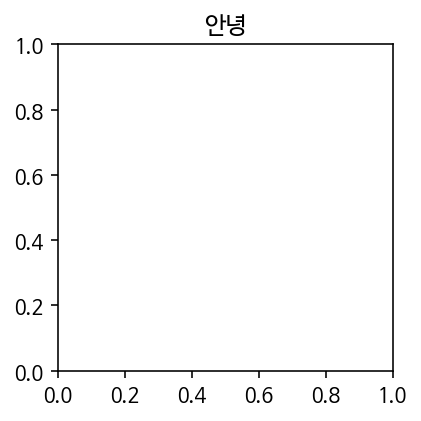

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize = (3,3))
plt.rc('font', family='NanumBarunGothic') 
%config InlineBackend.figure_format = 'retina'
plt.title("안녕")

In [4]:
%cd /content/drive/MyDrive/Projects/korean_medicine
from nlp_processing import *
set_global_determinism(seed=1337)

/content/drive/MyDrive/Projects/korean_medicine
True
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10966188277527047825
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11345264640
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8144627136296859034
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]
tf 2.6.0
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라


In [5]:
final_review = pd.read_csv("final_reviews.csv", index_col = 0)
final_review.head(2)

,hospital,stars,reviews,adress
0,청주나비솔한의원,10.0,병원이 전반적으로 깔끔해서 쾌적했어요대기가 좀 있지만 심하진 않은편이었고 간호사분들...,충북
1,청주나비솔한의원,7.5,체인 한의원이라서 망설였는데 시설도 깔끔하고 진료도 친절하게 너무 잘 봐주셨어요 그...,충북


In [6]:
final_review.adress.unique()

array(['충북', '경남', '서울', '전남', '경기', '인천', '대전', '충남', '대구', '광주', '전북',
       '경북', '울산', '강원', '부산', '제주', '세종'], dtype=object)

In [7]:
df = final_review.copy()
print(df.shape)

(14989, 4)


In [8]:
df = df.dropna(axis=0)
print(df.shape)

(14988, 4)


{'boxes': [<matplotlib.lines.Line2D at 0x7fc3712061d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc371210290>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc3712172d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc371210d50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc3712067d0>,
  <matplotlib.lines.Line2D at 0x7fc371206d10>]}

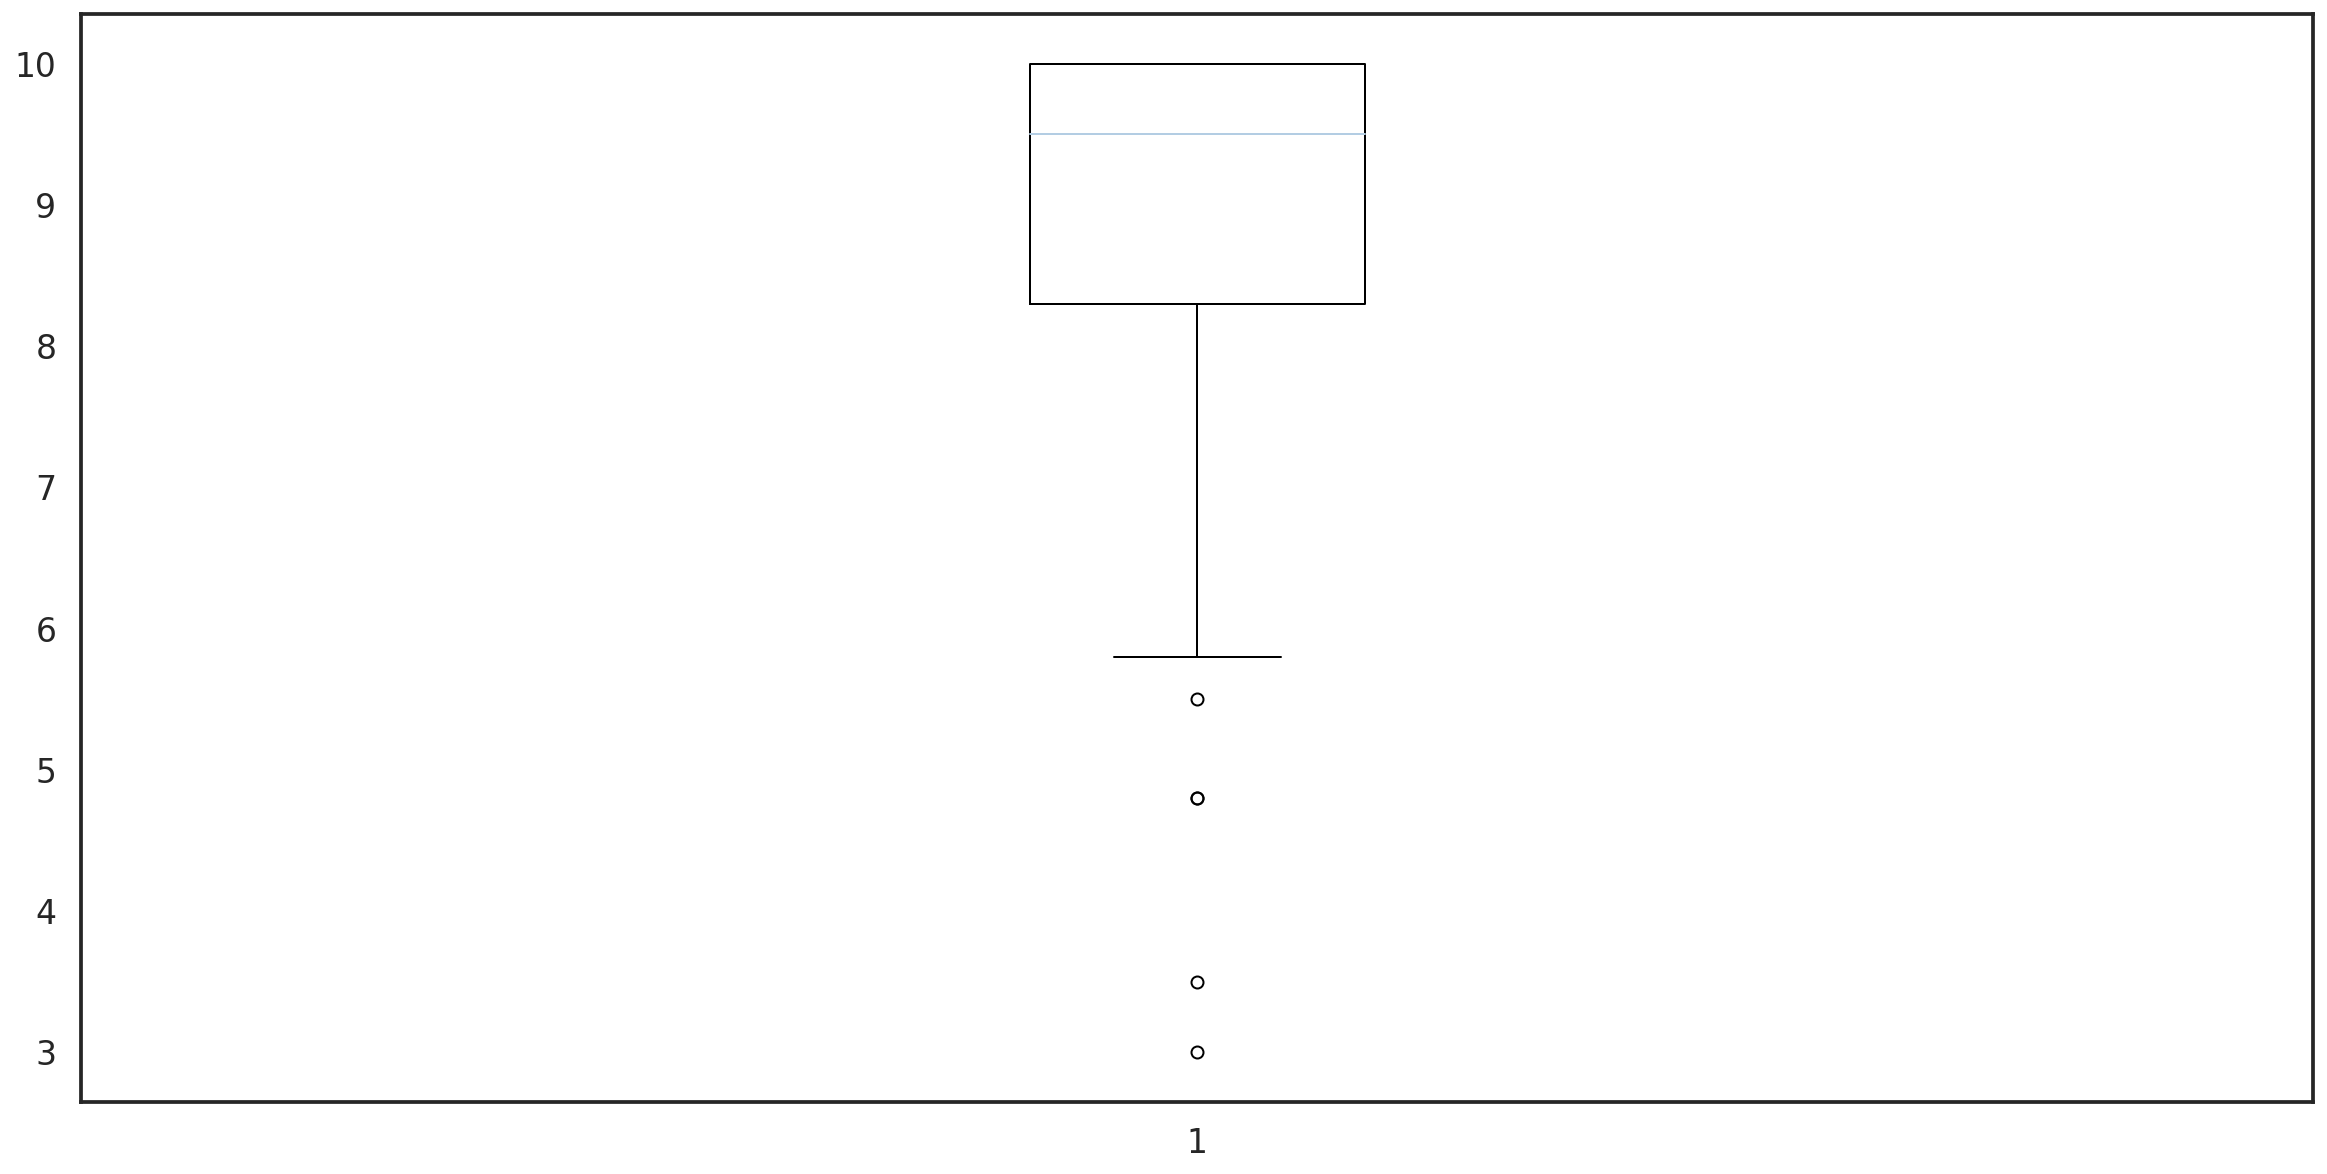

In [9]:
region= df[df['adress'] == '경남']
plt.boxplot(region.stars)

In [10]:
df_more6 = region[region['stars'] > 8.2]
print(df_more6.shape)
df_more6.head()

(324, 4)


,hospital,stars,reviews,adress
9,진주경희한의원,10.0,허리가 갑자기 좋지않아져서 급하게 다녀왔습니다 집과 가까운곳이고 직장인이라서 저녁 ...,경남
10,진주경희한의원,10.0,난생처음 한의원에 방문해봐요집근처에 처음 오픈한 한의원이라 청결하고 병원내부도 깔끔...,경남
11,진주경희한의원,8.5,허리가 아파서 병원을 찾던 중 아는 지인이 추천해줘서 가봤어요 접수하시는 분이 너...,경남
12,진주경희한의원,10.0,염좌 치료를 받았습니다 선생님께서 굉장히 친절하셨어요 의사선생님께 증상에 대해서 설...,경남
13,진주경희한의원,9.5,제 지인들이 추천해줘서 갔던 병원인데 너무 친절하셔서 좋았어요 제가 때를 잘 잡은 ...,경남


In [11]:
from konlpy.tag import Okt
okt = Okt()

In [12]:
def make_noun(x):
    x = okt.nouns(x)
    return x

In [13]:
df_more6['reviews'] = df_more6['reviews'].apply(make_noun)
for_network = df_more6.copy()
df_more6['reviews'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


9     [허리, 갑자기, 집, 곳, 직장인, 저녁, 시간, 도, 야간, 진료, 원장, 이하...
10    [난생처음, 한의원, 방문, 집, 근처, 처음, 오픈, 한의원, 병원, 부도, 간호...
11    [허리, 병원, 중, 지인, 추천, 접수, 분, 원장, 것, 것, 주시, 진료, 침...
12    [염좌, 치료, 선생님, 의사, 선생님, 증상, 대해, 설명, 때, 긴장, 편, 치...
13    [제, 지인, 추천, 병원, 제, 때, 다른, 병원, 달리, 대기, 시간, 별로, ...
Name: reviews, dtype: object

In [14]:
# 여기서부터 조심해서 네트워크 해보기
df_more6['reviews']  = [" ".join(review) for review in df_more6['reviews'].values]
df_more6['reviews'].head() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


9          허리 갑자기 집 곳 직장인 저녁 시간 도 야간 진료 원장 이하 간호사 자주 이용
10    난생처음 한의원 방문 집 근처 처음 오픈 한의원 병원 부도 간호사 서도 응대 원장 ...
11      허리 병원 중 지인 추천 접수 분 원장 것 것 주시 진료 침 아주 것 완전 전문 느낌
12    염좌 치료 선생님 의사 선생님 증상 대해 설명 때 긴장 편 치료 여러가지 방법 시도...
13    제 지인 추천 병원 제 때 다른 병원 달리 대기 시간 별로 지인 추천 만 병원 다음...
Name: reviews, dtype: object

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer = 'word', # 캐릭터 단위로 벡터화 할 수도 있습니다.
                             tokenizer = None, # 토크나이저를 따로 지정해 줄 수도 있습니다.
                             preprocessor = None, # 전처리 도구
                             stop_words = None, # 불용어 nltk등의 도구를 사용할 수도 있습니다.
                             min_df = 2, # 토큰이 나타날 최소 문서 개수로 오타나 자주 나오지 않는 특수한 전문용어 제거에 좋습니다. 
                             ngram_range=(1, 6), # BOW의 단위 갯수의 범위를 지정합니다.
                             max_features = 1000 # 만들 피처의 수, 단어의 수
                            )
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=1000,
                min_df=2, ngram_range=(1, 6), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [16]:
# df['covid'] 만 벡터화 합니다.
feature_vector = vectorizer.fit_transform(df_more6['reviews'])
feature_vector.shape

(324, 1000)

In [17]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

1000


['가게', '가격', '가격 부담', '가기', '가까이', '가까이 치료', '가끔', '가능', '가도', '가라']

In [18]:
pd.DataFrame(feature_vector[:].toarray(), columns=vocab).head()

,가게,가격,가격 부담,가기,가까이,가까이 치료,가끔,가능,가도,가라,가면,가성,가요,가정,가지,간다,간호,간호 선생님,간호사,간호사 기분,간호사 모두,간호사 병원,간호사 선생님,간호사 시간,간호사 친절,간호조무사,갈수,갈수록,감기,감기 몸살,감사,갑자기,강요,강추,개선,개원,개인,거나,거리,거북목,거의,걱정,건물,건물 병원,건물 지하,건물 지하 주차장,검사,검색,결과,결과 대해,...,한의학 박사,한지,한지 얼마,할머니,할머니 할아버지,할아버지,합리,항상,해주시,해주시 원장,해주시 치료,허리,허리 디스크,허리 방문,허리 신분,허리 어깨,허리 어깨 치료,허리 통증,허리 통증 방문,허리 통증 심해,허리 한의원,허리 허리,현재,혈압,호전,혹시,화장실,확인,환경,환자,환자 대기,환자 대기 시간,환자 시간,환자 진료,회복,회사,회사 근처,회산,회산 다리,효과,효과 물리치료,효과 병원,효과 시간,효과 직원,효과 처방,효과 치료,효과 한의원,후기,후유증,휴식
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.186279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.314672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.178550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.146972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.16349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.177684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# 위에서 구한 단어벡터를 더하면 단어가 전체에서 등장하는 횟수를 알 수 있습니다.
# 벡터화 된 피처를 확인해 봄
# Bag of words 에 몇 개의 단어가 들어있는지 확인
# 
dist = np.sum(feature_vector, axis=0)
    
df_freq = pd.DataFrame(dist, columns=vocab)
print(df_freq.shape)
df_freq.to_excel('df_freq.xlsx', encoding= 'utf-8')

(1, 1000)


In [20]:
# 행과 열의 축을 T로 바꿔주고 빈도수로 정렬합니다.
df_freq.T.sort_values(by=0, ascending=False).head(100)

,0
치료,20.604762
한의원,15.700024
진료,15.589787
방문,15.026133
병원,14.896529
...,...
도수,2.384196
체질,2.367279
대해 설명,2.364973
분위기,2.357011


In [21]:
# ["course", "freq"] 라는 컬럼명을 주어 위에서 만든 데이터프레임을 변환합니다.
df_freq_T = df_freq.T.reset_index()
df_freq_T.columns = ["words", "freq"]
df_freq_T.tail()
# df_freq_T.to_excel('df_freq_T.xlsx', encoding= 'utf-8')

,words,freq
995,효과 치료,0.570117
996,효과 한의원,0.789785
997,후기,0.269102
998,후유증,0.465610
999,휴식,0.510688


In [22]:
# 3개의 ngram과 빈도수로 역순 정렬을 하게 되면 빈도수가 높고, ngram수가 많은 순으로 정렬이 됨 
# 여기에서 drop_duplicates로 중복을 삭제 합니다.
print(df_freq_T.shape)
df_use = df_freq_T.drop_duplicates()
print(df_use.shape)

(1000, 2)
(1000, 2)


In [23]:
# 빈도수로 정렬을 하고 어떤 강좌가 댓글에서 가장 많이 언급되었는지 봅니다.
df_use = df_use.sort_values(by="freq", ascending=False)
df_use.head(20)

,words,freq
799,치료,20.604762
923,한의원,15.700024
717,진료,15.589787
268,방문,15.026133
299,병원,14.896529
394,선생님,13.216158
533,원장,12.303231
418,설명,11.293331
693,직원,10.441709
989,효과,9.207575


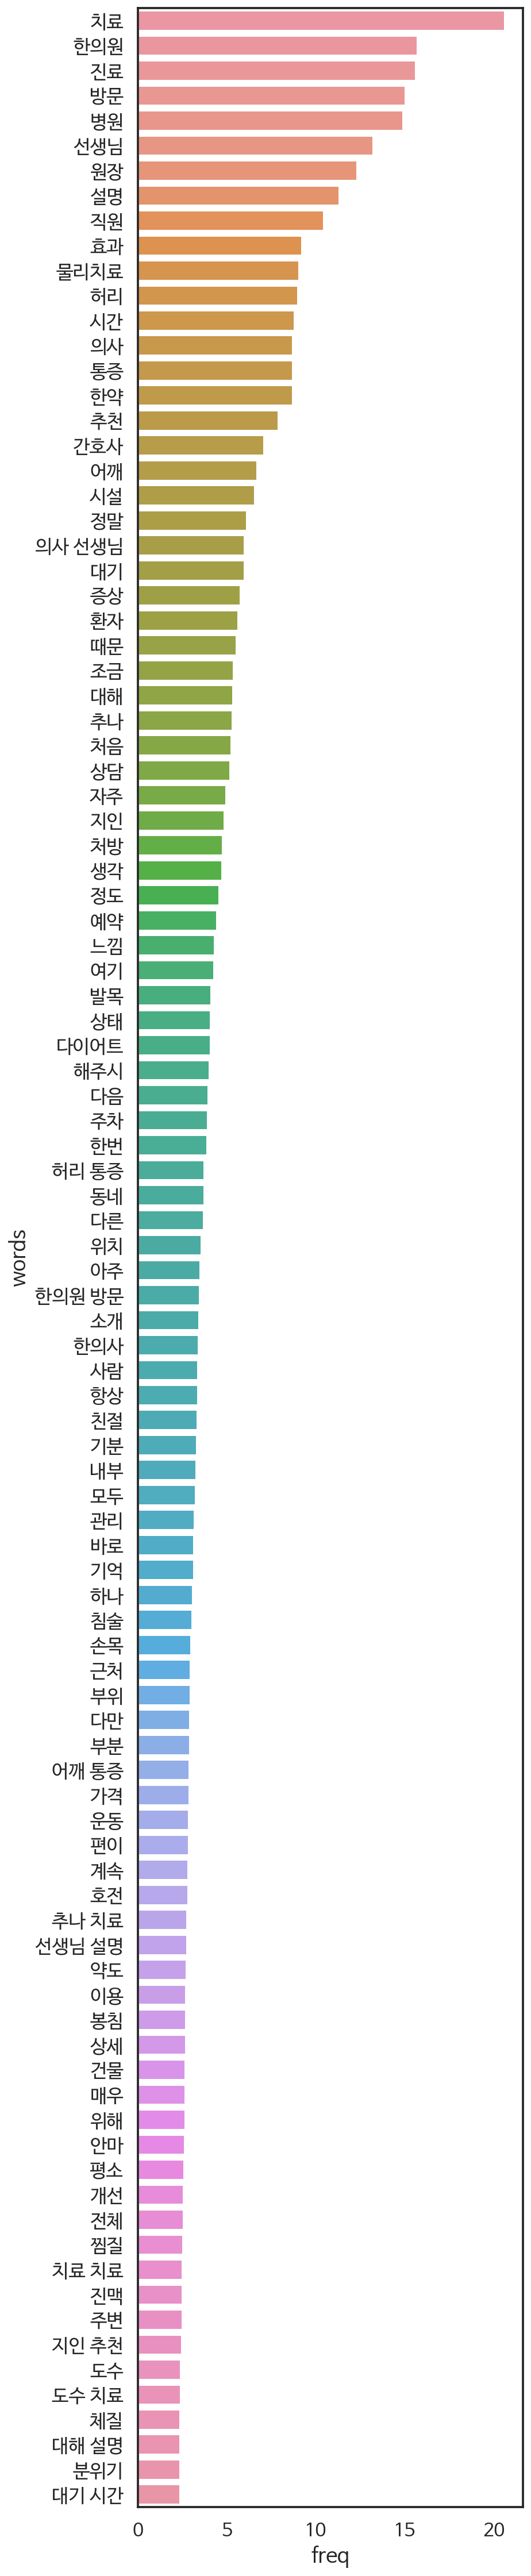

In [24]:
import seaborn as sns
plt.rc('font', family='NanumBarunGothic') 

plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(6,40))
ax = sns.barplot(x = 'freq', y = 'words', 
                 data = df_use.sort_values(by = 'freq', 
                                               ascending = False).head(100))
# ax.set(xlabel = 'Overall', ylabel = 'Pokemon')
# plt.savefig('covid2_frequency.png')
plt.show()


In [25]:
words_v2 = []

for num, i in enumerate (df_use.words):
  words_v2.append((i, int(df_use.freq[num])))

words_clean = words_v2.copy()

In [26]:
words_clean

[('치료', 2),
 ('한의원', 2),
 ('진료', 0),
 ('방문', 1),
 ('병원', 1),
 ('선생님', 0),
 ('원장', 1),
 ('설명', 0),
 ('직원', 0),
 ('효과', 0),
 ('물리치료', 1),
 ('허리', 0),
 ('시간', 0),
 ('의사', 0),
 ('통증', 1),
 ('한약', 0),
 ('추천', 0),
 ('간호사', 0),
 ('어깨', 7),
 ('시설', 0),
 ('정말', 0),
 ('의사 선생님', 0),
 ('대기', 2),
 ('증상', 0),
 ('환자', 0),
 ('때문', 0),
 ('조금', 0),
 ('대해', 0),
 ('추나', 1),
 ('처음', 0),
 ('상담', 0),
 ('자주', 1),
 ('지인', 0),
 ('처방', 1),
 ('생각', 2),
 ('정도', 0),
 ('예약', 0),
 ('느낌', 0),
 ('여기', 1),
 ('발목', 1),
 ('상태', 2),
 ('다이어트', 1),
 ('해주시', 2),
 ('다음', 0),
 ('주차', 0),
 ('한번', 0),
 ('허리 통증', 2),
 ('동네', 1),
 ('다른', 0),
 ('위치', 0),
 ('아주', 0),
 ('한의원 방문', 0),
 ('소개', 0),
 ('한의사', 1),
 ('사람', 0),
 ('항상', 2),
 ('친절', 0),
 ('기분', 0),
 ('내부', 0),
 ('모두', 0),
 ('관리', 0),
 ('바로', 1),
 ('기억', 1),
 ('하나', 0),
 ('침술', 0),
 ('손목', 0),
 ('근처', 0),
 ('부위', 0),
 ('다만', 0),
 ('부분', 0),
 ('어깨 통증', 0),
 ('가격', 0),
 ('운동', 1),
 ('편이', 0),
 ('계속', 3),
 ('호전', 0),
 ('추나 치료', 0),
 ('선생님 설명', 1),
 ('약도', 0),
 ('이용', 0),
 ('봉침', 2)

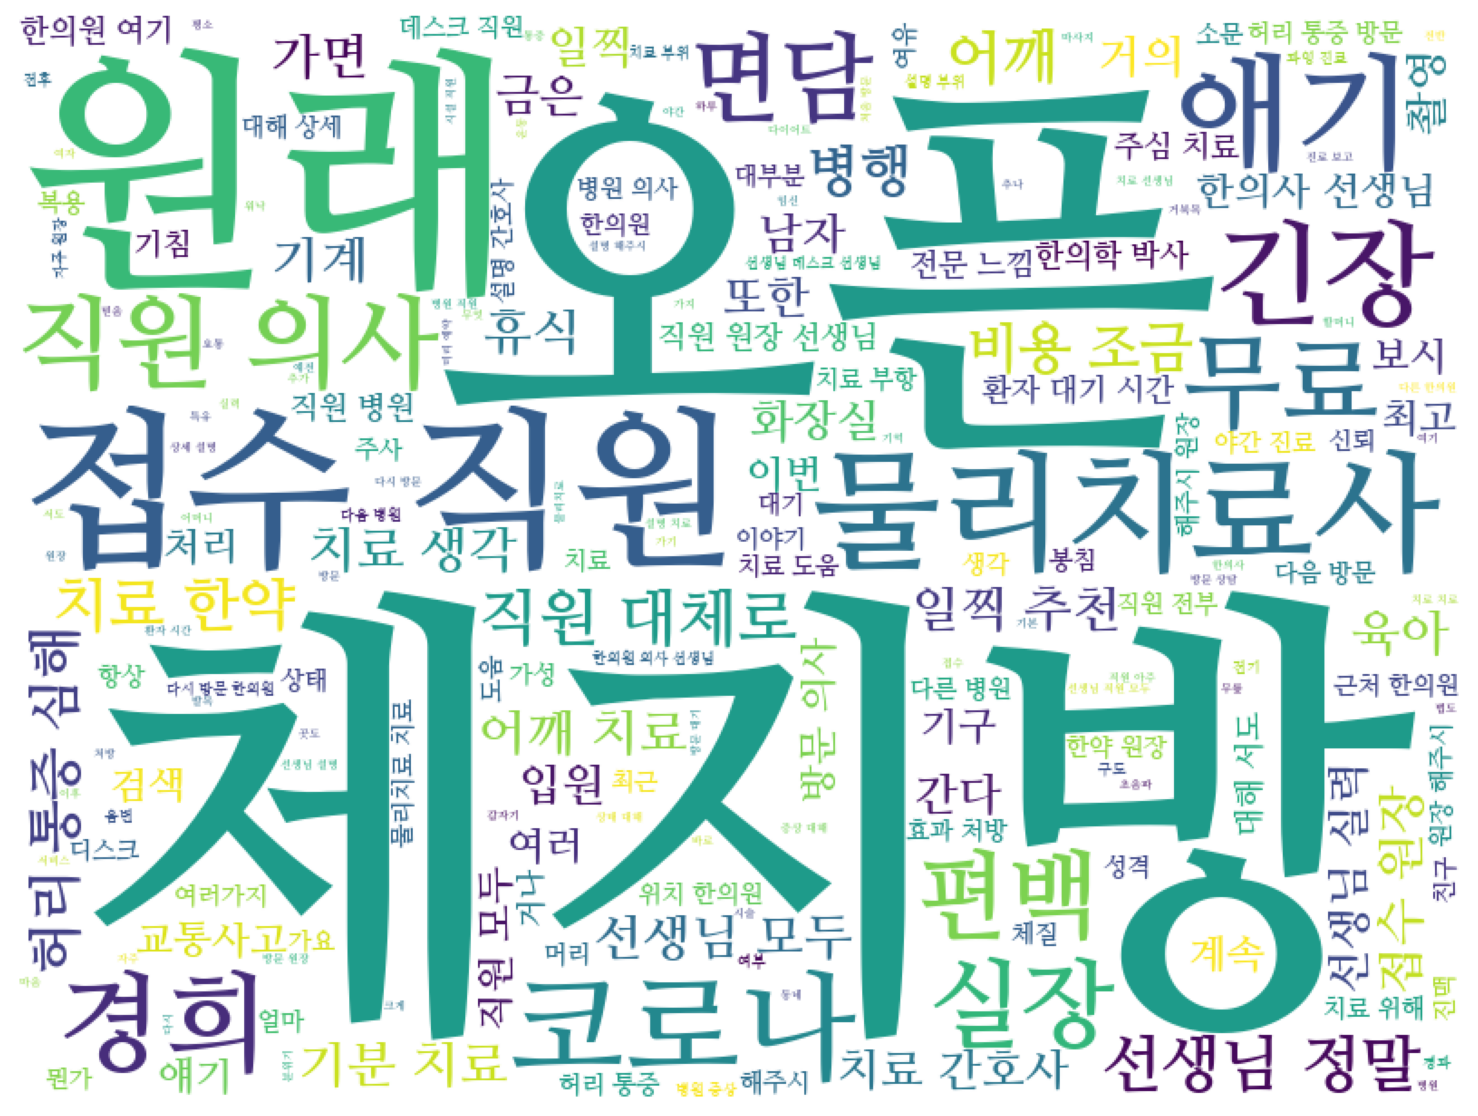

In [27]:
#불용어
from wordcloud import STOPWORDS
from wordcloud import WordCloud


mystopwords = set(STOPWORDS)
mystopwords.add('치료')
mystopwords.update(['설명의사','한의원'])


#워드클라우드. #폰트 경로설정 가장 중요


wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
                      stopwords = mystopwords,
                      background_color='white',
                      width=800,
                      height=600)

# print(dict(words_v2))

cloud = wordcloud.generate_from_frequencies(dict(words_clean))
plt.figure(figsize=(15, 10))
plt.axis('off')
plt.imshow(cloud)
plt.show()

## **FOR**

In [28]:
j = 0

del_list = []

for num, i in enumerate(words_clean):
    if '가격' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
print(j)
print(len(del_list))       

71 ('가격', 0)
765 ('치료 가격', 0)
779 ('가격 부담', 0)
0
3


In [29]:
j =0

for num, i in enumerate(words_clean):
    if '불친절' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

804 ('불친절', 0)
0
4


In [30]:
j =0

for num, i in enumerate(words_clean):
    if '의사' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

13 ('의사', 0)
21 ('의사 선생님', 0)
53 ('한의사', 1)
108 ('한의사 선생님', 3)
128 ('방문 의사', 3)
243 ('직원 의사', 9)
312 ('방문 의사 선생님', 0)
321 ('직원 의사 선생님', 0)
332 ('의사 선생님 직원', 0)
346 ('병원 의사', 2)
359 ('의사 간호사', 0)
463 ('병원 의사 선생님', 1)
492 ('의사 간호사 선생님', 1)
613 ('의사 선생님 시간', 0)
618 ('의사 선생님 상담', 1)
623 ('의사 선생님 설명', 0)
640 ('의사 직원', 0)
641 ('선생님 의사', 0)
642 ('선생님 의사 선생님', 0)
728 ('의사 선생님 직원 모두', 0)
739 ('의사 선생님 진료', 0)
750 ('한의사 선생님 설명', 0)
791 ('의사 진료', 0)
877 ('의사 선생님 병원', 0)
903 ('한의원 방문 의사', 0)
904 ('한의원 방문 의사 선생님', 0)
908 ('한의원 의사 선생님', 2)
909 ('한의원 의사', 1)
982 ('의사 선생님 증상', 1)
25
33


In [31]:
j =0

for num, i in enumerate(words_clean):
    if '간호사' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

17 ('간호사', 0)
117 ('간호사 선생님', 0)
234 ('병원 간호사', 0)
359 ('의사 간호사', 0)
360 ('간호사 병원', 0)
492 ('의사 간호사 선생님', 1)
500 ('치료 간호사', 4)
522 ('병원 간호사 병원', 0)
532 ('간호사 친절', 0)
576 ('설명 간호사', 2)
638 ('선생님 간호사', 0)
740 ('간호사 시간', 0)
806 ('간호사 기분', 0)
858 ('간호사 모두', 1)
997 ('하나 간호사', 0)
8
48


In [32]:
j =0

for num, i in enumerate(words_clean):
    if '다이어트' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

41 ('다이어트', 1)
232 ('다이어트 때문', 0)
249 ('다이어트 한약', 0)
404 ('다이어트 처방', 0)
428 ('다이어트 방문', 0)
622 ('다이어트 약지', 0)
1
54


In [33]:
j =0

for num, i in enumerate(words_clean):
    if '대기' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

22 ('대기', 2)
99 ('대기 시간', 0)
242 ('방문 대기', 1)
367 ('환자 대기', 0)
368 ('대기실', 0)
458 ('대기 치료', 0)
480 ('대기 환자', 0)
508 ('예약 대기', 1)
813 ('그냥 대기', 0)
820 ('대기 바로', 0)
821 ('대기 바로 진료', 0)
855 ('대기 조금', 1)
896 ('대기 내시경', 0)
920 ('환자 대기 시간', 3)
8
68


In [34]:
j =0

for num, i in enumerate(words_clean):
    if '도수' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

94 ('도수 치료', 0)
95 ('도수', 0)
0
70


In [35]:
j =0

for num, i in enumerate(words_clean):
    if '한의원' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

1 ('한의원', 2)
51 ('한의원 방문', 0)
186 ('동네 한의원', 0)
199 ('다른 한의원', 1)
210 ('한의원 원장', 0)
220 ('한의원 진료', 0)
247 ('한의원 처음', 0)
315 ('한의원 추천', 0)
337 ('진료 한의원', 0)
355 ('근처 한의원', 2)
364 ('한의원 특유', 1)
413 ('허리 한의원', 0)
431 ('한의원 방문 원장', 1)
442 ('효과 한의원', 1)
451 ('청담 한의원', 0)
489 ('한의원 환자', 1)
498 ('추천 한의원', 0)
523 ('위치 한의원', 2)
530 ('여기 한의원', 1)
536 ('한의원 특유 냄새', 0)
554 ('한의원 가면', 0)
558 ('근처 한의원 방문', 0)
571 ('한의원 사람', 1)
604 ('한의원 간다', 1)
611 ('한의원 효과', 1)
639 ('발목 한의원', 0)
735 ('한의원 시설', 0)
737 ('지인 추천 한의원', 0)
754 ('방문 한의원', 0)
755 ('다시 방문 한의원', 2)
771 ('한의원 가게', 0)
802 ('한의원 전체', 0)
829 ('한의원 방문 진료', 0)
853 ('피부 한의원', 1)
894 ('한의원 한약', 0)
903 ('한의원 방문 의사', 0)
904 ('한의원 방문 의사 선생님', 0)
908 ('한의원 의사 선생님', 2)
909 ('한의원 의사', 1)
953 ('한의원 동네', 1)
954 ('한의원 동네 한의원', 0)
957 ('한의원 여기', 3)
25
112


In [36]:
j =0

for num, i in enumerate(words_clean):
    if '물리치료' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

10 ('물리치료', 1)
209 ('물리치료 치료', 2)
299 ('물리치료사', 14)
314 ('치료 물리치료', 0)
353 ('직원 물리치료', 0)
405 ('설명 물리치료', 0)
422 ('효과 물리치료', 0)
466 ('물리치료 효과', 1)
526 ('정말 물리치료', 0)
527 ('물리치료 정말', 0)
538 ('물리치료 원장', 0)
546 ('물리치료 기구', 0)
550 ('물리치료 위해', 0)
590 ('물리치료 선생님', 0)
679 ('물리치료 추나', 0)
691 ('물리치료 치료 상태', 0)
718 ('진료 물리치료', 0)
839 ('물리치료 직원', 0)
887 ('통증 때문 물리치료', 0)
888 ('때문 물리치료', 0)
18
132


In [37]:
j =0

for num, i in enumerate(words_clean):
    if '병원' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

4 ('병원', 1)
107 ('병원 방문', 0)
155 ('방문 병원', 0)
200 ('병원 직원', 1)
234 ('병원 간호사', 0)
255 ('병원 내부', 0)
336 ('추천 병원', 0)
346 ('병원 의사', 2)
354 ('통증 병원', 0)
360 ('간호사 병원', 0)
370 ('병원 병원', 0)
373 ('병원 부도', 0)
384 ('선생님 병원', 0)
424 ('병원 건물', 0)
429 ('일단 병원', 0)
434 ('진료 병원', 0)
443 ('다른 병원', 2)
460 ('건물 병원', 0)
463 ('병원 의사 선생님', 1)
516 ('병원 아주', 0)
517 ('병원 분위기', 0)
522 ('병원 간호사 병원', 0)
535 ('평소 병원', 0)
545 ('병원 시설', 1)
565 ('방문 병원 부도', 0)
572 ('병원 안마', 0)
587 ('병원 추천', 0)
605 ('근처 병원', 0)
608 ('지인 추천 병원', 0)
615 ('조금 병원', 0)
627 ('정말 병원', 0)
635 ('상담 병원', 0)
637 ('병원 예약', 0)
650 ('병원 선생님', 0)
662 ('하니 병원', 1)
674 ('병원 방문 원장', 0)
680 ('병원 정말', 0)
714 ('설명 병원', 0)
778 ('금방 병원', 0)
788 ('다음 병원', 2)
793 ('병원 얼마', 1)
795 ('병원 입구', 0)
810 ('위치 병원', 0)
811 ('병원 시간', 1)
830 ('효과 병원', 0)
835 ('병원 분위기 진료', 1)
847 ('병원 허리', 0)
877 ('의사 선생님 병원', 0)
897 ('병원 진료', 1)
905 ('증상 병원', 1)
906 ('증상 병원 방문', 0)
910 ('직원 병원', 3)
911 ('직원 병원 내부', 0)
921 ('병원 증상', 2)
922 ('운영 병원', 0)
924 ('느낌 병원', 0)
926 ('병원 다른', 0)


In [38]:
j =0

for num, i in enumerate(words_clean):
    if '시간' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

12 ('시간', 0)
99 ('대기 시간', 0)
150 ('점심시간', 0)
211 ('환자 시간', 1)
313 ('진료 시간', 0)
327 ('치료 시간', 0)
415 ('선생님 시간', 0)
469 ('시간 조금', 1)
613 ('의사 선생님 시간', 0)
653 ('점심시간 방문', 0)
688 ('사람 시간', 0)
702 ('예약 시간', 0)
740 ('간호사 시간', 0)
811 ('병원 시간', 1)
825 ('운영 시간', 0)
920 ('환자 대기 시간', 3)
960 ('효과 시간', 0)
6
211


In [39]:
j =0

for num, i in enumerate(words_clean):
    if '예약' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

36 ('예약', 0)
251 ('미리 예약', 1)
425 ('예약 진료', 0)
508 ('예약 대기', 1)
628 ('편이 예약', 0)
637 ('병원 예약', 0)
702 ('예약 시간', 0)
709 ('예약 방문', 0)
826 ('사람 예약', 0)
883 ('모두 예약', 0)
918 ('예약 제로 운영', 0)
919 ('예약 제로', 0)
2
223


In [40]:
j =0

for num, i in enumerate(words_clean):
    if '주사' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

350 ('주사', 2)
2
224


In [41]:
j =0

for num, i in enumerate(words_clean):
    if '증상' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

23 ('증상', 0)
179 ('치료 증상', 0)
278 ('증상 대해', 1)
347 ('증상 호전', 0)
348 ('치료 증상 호전', 0)
436 ('증상 대해 설명', 0)
496 ('증상 개선', 0)
559 ('증상 설명', 0)
651 ('증상 방문', 0)
905 ('증상 병원', 1)
906 ('증상 병원 방문', 0)
921 ('병원 증상', 2)
981 ('선생님 증상', 0)
982 ('의사 선생님 증상', 1)
5
238


In [42]:
j =0

for num, i in enumerate(words_clean):
    if '직원' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

8 ('직원', 0)
129 ('원장 직원', 0)
137 ('직원 모두', 3)
165 ('진료 직원', 0)
167 ('선생님 직원', 0)
200 ('병원 직원', 1)
243 ('직원 의사', 9)
260 ('직원 치료', 0)
274 ('시설 직원', 1)
291 ('방문 직원', 0)
321 ('직원 의사 선생님', 0)
324 ('직원 아주', 1)
332 ('의사 선생님 직원', 0)
352 ('선생님 직원 모두', 1)
353 ('직원 물리치료', 0)
379 ('직원 설명', 0)
409 ('직원 원장', 0)
438 ('효과 직원', 1)
471 ('데스크 직원', 2)
487 ('진료 직원 치료', 0)
509 ('설명 직원', 0)
606 ('직원 안내', 1)
610 ('직원 매우', 0)
626 ('전반 직원', 1)
640 ('의사 직원', 0)
658 ('정말 직원', 0)
666 ('직원 원장 선생님', 3)
670 ('직원 전부', 2)
681 ('치료 직원', 0)
728 ('의사 선생님 직원 모두', 0)
839 ('물리치료 직원', 0)
898 ('직원 편이', 0)
910 ('직원 병원', 3)
911 ('직원 병원 내부', 0)
923 ('접수 직원', 15)
961 ('직원 대체로', 8)
52
274


In [43]:
j =0

for num, i in enumerate(words_clean):
    if '진료' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

2 ('진료', 0)
118 ('원장 진료', 0)
159 ('방문 진료', 0)
165 ('진료 직원', 0)
189 ('야간 진료', 2)
220 ('한의원 진료', 0)
254 ('진료 보고', 1)
264 ('진료 원장', 0)
288 ('설명 진료', 0)
298 ('선생님 진료', 0)
302 ('진료 진료', 0)
313 ('진료 시간', 0)
337 ('진료 한의원', 0)
396 ('주말 진료', 0)
425 ('예약 진료', 0)
434 ('진료 병원', 0)
456 ('진료 정말', 1)
472 ('진료 선생님', 0)
473 ('진료 방문', 1)
481 ('진료 치료', 0)
482 ('치료 진료', 1)
487 ('진료 직원 치료', 0)
510 ('기분 진료', 0)
524 ('진료 추나', 0)
582 ('무엇 진료', 0)
624 ('진료 금액', 0)
634 ('진료 이유', 0)
659 ('진료 한약', 1)
704 ('진료 통증', 0)
706 ('진료 다른', 1)
707 ('방문 진료 다른', 0)
718 ('진료 물리치료', 0)
722 ('직접 진료', 0)
733 ('추가 진료', 0)
739 ('의사 선생님 진료', 0)
745 ('진료 부분', 0)
777 ('과잉 진료', 2)
791 ('의사 진료', 0)
821 ('대기 바로 진료', 0)
822 ('바로 진료', 0)
829 ('한의원 방문 진료', 0)
834 ('진료 보시', 0)
835 ('병원 분위기 진료', 1)
836 ('분위기 진료', 0)
876 ('진료 체질', 0)
886 ('진료 설명', 1)
897 ('병원 진료', 1)
907 ('진료 갈수', 0)
938 ('진행 진료', 0)
955 ('마음 진료', 0)
991 ('사람 진료', 0)
993 ('진료 시술', 0)
995 ('보고 진료', 0)
996 ('환자 진료', 0)
13
328


In [44]:
j =0

for num, i in enumerate(words_clean):
    if '찜질' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

89 ('찜질', 0)
441 ('방문 찜질', 1)
562 ('찜질 하니', 0)
1
331


In [45]:
j =0

for num, i in enumerate(words_clean):
    if '처방' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

33 ('처방', 1)
391 ('한약 처방', 1)
404 ('다이어트 처방', 0)
464 ('효과 처방', 2)
575 ('치료 처방', 1)
895 ('설명 처방', 1)
925 ('처방 이후', 0)
930 ('질문 처방', 0)
6
339


In [46]:
j =0

for num, i in enumerate(words_clean):
    if '처음' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

29 ('처음', 0)
247 ('한의원 처음', 0)
343 ('처음 방문', 1)
675 ('치료 처음', 1)
727 ('방문 처음', 0)
833 ('처음 효과', 0)
978 ('설명 처음', 0)
2
346


In [47]:
j =0

for num, i in enumerate(words_clean):
    if '치료' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0 ('치료', 2)
10 ('물리치료', 1)
76 ('추나 치료', 0)
90 ('치료 치료', 1)
94 ('도수 치료', 0)
153 ('어깨 치료', 5)
172 ('치료 효과', 0)
179 ('치료 증상', 0)
183 ('설명 치료', 1)
209 ('물리치료 치료', 2)
217 ('치료 방법', 0)
241 ('치료 추나', 0)
259 ('치료 선생님', 1)
260 ('직원 치료', 0)
299 ('물리치료사', 14)
314 ('치료 물리치료', 0)
322 ('원장 치료', 0)
327 ('치료 시간', 0)
329 ('방문 치료', 0)
348 ('치료 증상 호전', 0)
353 ('직원 물리치료', 0)
382 ('추나 치료 치료', 0)
392 ('조금 치료', 0)
403 ('치료 도움', 2)
405 ('설명 물리치료', 0)
408 ('통증 치료', 0)
416 ('치료 원장', 0)
422 ('효과 물리치료', 0)
452 ('부항 치료', 0)
458 ('대기 치료', 0)
466 ('물리치료 효과', 1)
476 ('치료 부항', 2)
481 ('진료 치료', 0)
482 ('치료 진료', 1)
486 ('치료 시설', 0)
487 ('진료 직원 치료', 0)
494 ('치료 방문', 0)
500 ('치료 간호사', 4)
507 ('치료 통증', 1)
519 ('치료 추나 요법', 0)
521 ('치료 부분', 1)
526 ('정말 물리치료', 0)
527 ('물리치료 정말', 0)
538 ('물리치료 원장', 0)
539 ('치료 허리 통증', 1)
540 ('치료 허리', 0)
542 ('선생님 설명 치료', 1)
546 ('물리치료 기구', 0)
550 ('물리치료 위해', 0)
560 ('기분 치료', 5)
564 ('치료 추나 치료', 0)
566 ('치료 서비스', 0)
570 ('치료 보험', 0)
575 ('치료 처방', 1)
577 ('치료 상담', 1)
578 ('해주시 치료', 1)
588 ('상세 

In [48]:
j =0

for num, i in enumerate(words_clean):
    if '원장' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

6 ('원장', 1)
118 ('원장 진료', 0)
129 ('원장 직원', 0)
131 ('방문 원장', 1)
149 ('원장 선생님', 0)
182 ('원장 설명', 0)
210 ('한의원 원장', 0)
264 ('진료 원장', 0)
317 ('원장 정말', 0)
322 ('원장 치료', 0)
326 ('원장 상담', 0)
328 ('내부 원장', 0)
375 ('원장 서도', 0)
409 ('직원 원장', 0)
416 ('치료 원장', 0)
431 ('한의원 방문 원장', 1)
457 ('해주시 원장', 2)
538 ('물리치료 원장', 0)
580 ('대표 원장', 1)
589 ('한약 원장', 2)
601 ('원장 해주시', 2)
629 ('원장 선생님 설명', 1)
630 ('조금 원장', 1)
654 ('원장 친절', 1)
666 ('직원 원장 선생님', 3)
673 ('접수 원장', 5)
674 ('병원 방문 원장', 0)
689 ('여자 원장', 0)
725 ('설명 원장', 0)
775 ('자주 원장', 2)
784 ('추천 원장', 0)
785 ('원장 환자', 0)
794 ('상담 원장', 0)
838 ('원장 직접', 0)
912 ('원장 어디가', 0)
952 ('원장 상세', 0)
963 ('선생님 원장', 0)
23
493


In [49]:
### 지우기

j =0

for num, i in enumerate(words_clean):
    if '선생님' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

5 ('선생님', 0)
21 ('의사 선생님', 0)
77 ('선생님 설명', 1)
108 ('한의사 선생님', 3)
117 ('간호사 선생님', 0)
149 ('원장 선생님', 0)
167 ('선생님 직원', 0)
259 ('치료 선생님', 1)
298 ('선생님 진료', 0)
312 ('방문 의사 선생님', 0)
321 ('직원 의사 선생님', 0)
332 ('의사 선생님 직원', 0)
352 ('선생님 직원 모두', 1)
376 ('선생님 모두', 5)
384 ('선생님 병원', 0)
410 ('선생님 상담', 0)
412 ('데스크 선생님', 1)
415 ('선생님 시간', 0)
463 ('병원 의사 선생님', 1)
472 ('진료 선생님', 0)
492 ('의사 간호사 선생님', 1)
529 ('선생님 느낌', 0)
542 ('선생님 설명 치료', 1)
567 ('여자 선생님', 0)
590 ('물리치료 선생님', 0)
602 ('선생님 친절', 0)
613 ('의사 선생님 시간', 0)
618 ('의사 선생님 상담', 1)
623 ('의사 선생님 설명', 0)
629 ('원장 선생님 설명', 1)
632 ('선생님 봉침', 0)
633 ('선생님 실력', 4)
638 ('선생님 간호사', 0)
641 ('선생님 의사', 0)
642 ('선생님 의사 선생님', 0)
650 ('병원 선생님', 0)
666 ('직원 원장 선생님', 3)
686 ('선생님 데스크 선생님', 2)
687 ('선생님 데스크', 0)
712 ('선생님 환자', 1)
728 ('의사 선생님 직원 모두', 0)
739 ('의사 선생님 진료', 0)
750 ('한의사 선생님 설명', 0)
770 ('간호 선생님', 0)
874 ('선생님 치료', 0)
877 ('의사 선생님 병원', 0)
904 ('한의원 방문 의사 선생님', 0)
908 ('한의원 의사 선생님', 2)
914 ('선생님 정말', 8)
963 ('선생님 원장', 0)
981 ('선생님 증상', 0)
982 ('의사 

In [50]:
j =0

for num, i in enumerate(words_clean):
    if '한약' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

15 ('한약', 0)
249 ('다이어트 한약', 0)
307 ('한약 방문', 0)
391 ('한약 처방', 1)
465 ('한약 효과', 1)
583 ('진맥 한약', 0)
589 ('한약 원장', 2)
659 ('진료 한약', 1)
668 ('한약 자꾸', 0)
678 ('방문 한약', 0)
792 ('치료 한약', 7)
857 ('복용 한약', 0)
894 ('한의원 한약', 0)
12
558


In [51]:
j =0

for num, i in enumerate(words_clean):
    if '침' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

64 ('침술', 0)
80 ('봉침', 2)
154 ('침대', 0)
581 ('침술 효과', 0)
632 ('선생님 봉침', 0)
716 ('봉침 부항', 0)
958 ('기침', 3)
5
565


In [52]:
### 지우기

j =0

for num, i in enumerate(words_clean):
    if '환자' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

24 ('환자', 0)
211 ('환자 시간', 1)
367 ('환자 대기', 0)
480 ('대기 환자', 0)
489 ('한의원 환자', 1)
712 ('선생님 환자', 1)
785 ('원장 환자', 0)
807 ('느낌 환자', 0)
920 ('환자 대기 시간', 3)
996 ('환자 진료', 0)
6
575


In [53]:
j =0

for num, i in enumerate(words_clean):
    if '효과' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

9 ('효과', 0)
172 ('치료 효과', 0)
422 ('효과 물리치료', 0)
438 ('효과 직원', 1)
442 ('효과 한의원', 1)
464 ('효과 처방', 2)
465 ('한약 효과', 1)
466 ('물리치료 효과', 1)
515 ('바로 효과', 1)
581 ('침술 효과', 0)
586 ('설명 효과', 1)
596 ('도움 효과', 0)
597 ('치료 도움 효과', 1)
611 ('한의원 효과', 1)
676 ('효과 치료', 0)
721 ('정도 효과', 0)
731 ('조금 효과', 1)
812 ('운동 효과', 0)
830 ('효과 병원', 0)
833 ('처음 효과', 0)
960 ('효과 시간', 0)
11
596


In [54]:
j =0

for num, i in enumerate(words_clean):
    if '통증' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

14 ('통증', 1)
46 ('허리 통증', 2)
70 ('어깨 통증', 0)
289 ('통증 방문', 0)
290 ('허리 통증 방문', 2)
354 ('통증 병원', 0)
369 ('통증 때문', 0)
408 ('통증 치료', 0)
448 ('허리 통증 심해', 6)
449 ('통증 심해', 1)
507 ('치료 통증', 1)
539 ('치료 허리 통증', 1)
563 ('통증 거의', 0)
646 ('통증 개선', 0)
704 ('진료 통증', 0)
738 ('통증 때문 방문', 0)
816 ('통증 원인', 0)
887 ('통증 때문 물리치료', 0)
14
614


In [55]:
j =0

for num, i in enumerate(words_clean):
    if '상담' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

30 ('상담', 0)
277 ('방문 상담', 1)
326 ('원장 상담', 0)
410 ('선생님 상담', 0)
447 ('상담 실장', 0)
577 ('치료 상담', 1)
618 ('의사 선생님 상담', 1)
635 ('상담 병원', 0)
794 ('상담 원장', 0)
3
623


In [56]:
j =0

for num, i in enumerate(words_clean):
    if '기분' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

57 ('기분', 0)
510 ('기분 진료', 0)
560 ('기분 치료', 5)
806 ('간호사 기분', 0)
5
627


In [57]:
## 지울내용


j =0

for num, i in enumerate(words_clean):
    if '중심' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
627


In [58]:
## 지울내용


j =0

for num, i in enumerate(words_clean):
    if '자기' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

196 ('갑자기', 1)
1
628


In [59]:
## 내용수정


j =0

for num, i in enumerate(words_clean):
    if '파서' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

484 ('파서', 0)
0
629


In [60]:
## 내용수정 계속


j =0

for num, i in enumerate(words_clean):
    if '엄마' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

198 ('엄마', 0)
0
630


In [61]:
## 내용수정 계속


j =0

for num, i in enumerate(words_clean):
    if '허름' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
630


In [62]:
## 내용수정 계속


j =0

for num, i in enumerate(words_clean):
    if '기도' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

475 ('기도', 1)
1
631


In [63]:
## 내용수정 계속


j =0

for num, i in enumerate(words_clean):
    if '대기' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

22 ('대기', 2)
99 ('대기 시간', 0)
242 ('방문 대기', 1)
367 ('환자 대기', 0)
368 ('대기실', 0)
458 ('대기 치료', 0)
480 ('대기 환자', 0)
508 ('예약 대기', 1)
813 ('그냥 대기', 0)
820 ('대기 바로', 0)
821 ('대기 바로 진료', 0)
855 ('대기 조금', 1)
896 ('대기 내시경', 0)
920 ('환자 대기 시간', 3)
8
645


In [64]:
## 내용수정 계속


j =0

for num, i in enumerate(words_clean):
    if '거기' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
645


In [65]:
del_list = list(map(int, del_list))
new_word_freq = [i for j, i in enumerate(words_clean) if j not in del_list]

In [66]:
19+67

86

In [67]:
adding = ('가격', 24), ('불친절', 21), ('간호사', 41), ('다이어트', 66), ('대기', 86), ('도수', 61), ('물리치료', 59),\
    ('병원', 127), ('시간', 91), ('예약', 54), ('주사', 15), ('증상', 22), ('직원', 44), ('진료', 318),('찜질', 14), ('처방', 29), ('치료', 603),\
        ('의사', 446), ('한약', 62), ('침', 26), ('효과', 74), ('통증', 62), ('상담', 16), ('기분', 22), ('아프다', 78), ('계속', 22), ('엄마', 4),\
            ('허름함', 42)

In [68]:
print(len(new_word_freq))

546


In [69]:
for i in adding:
    new_word_freq.append(i)

In [70]:
print(len(new_word_freq))

574


In [71]:
new_word_freq = sorted(words_clean, key=lambda aaa:aaa[1])
del new_word_freq[-2]
new_word_freq[-10:]

[('직원 의사', 9),
 ('무료', 9),
 ('경희', 10),
 ('긴장', 11),
 ('코로나', 12),
 ('애기', 13),
 ('물리치료사', 14),
 ('오픈', 15),
 ('원래', 15),
 ('체지방', 20)]

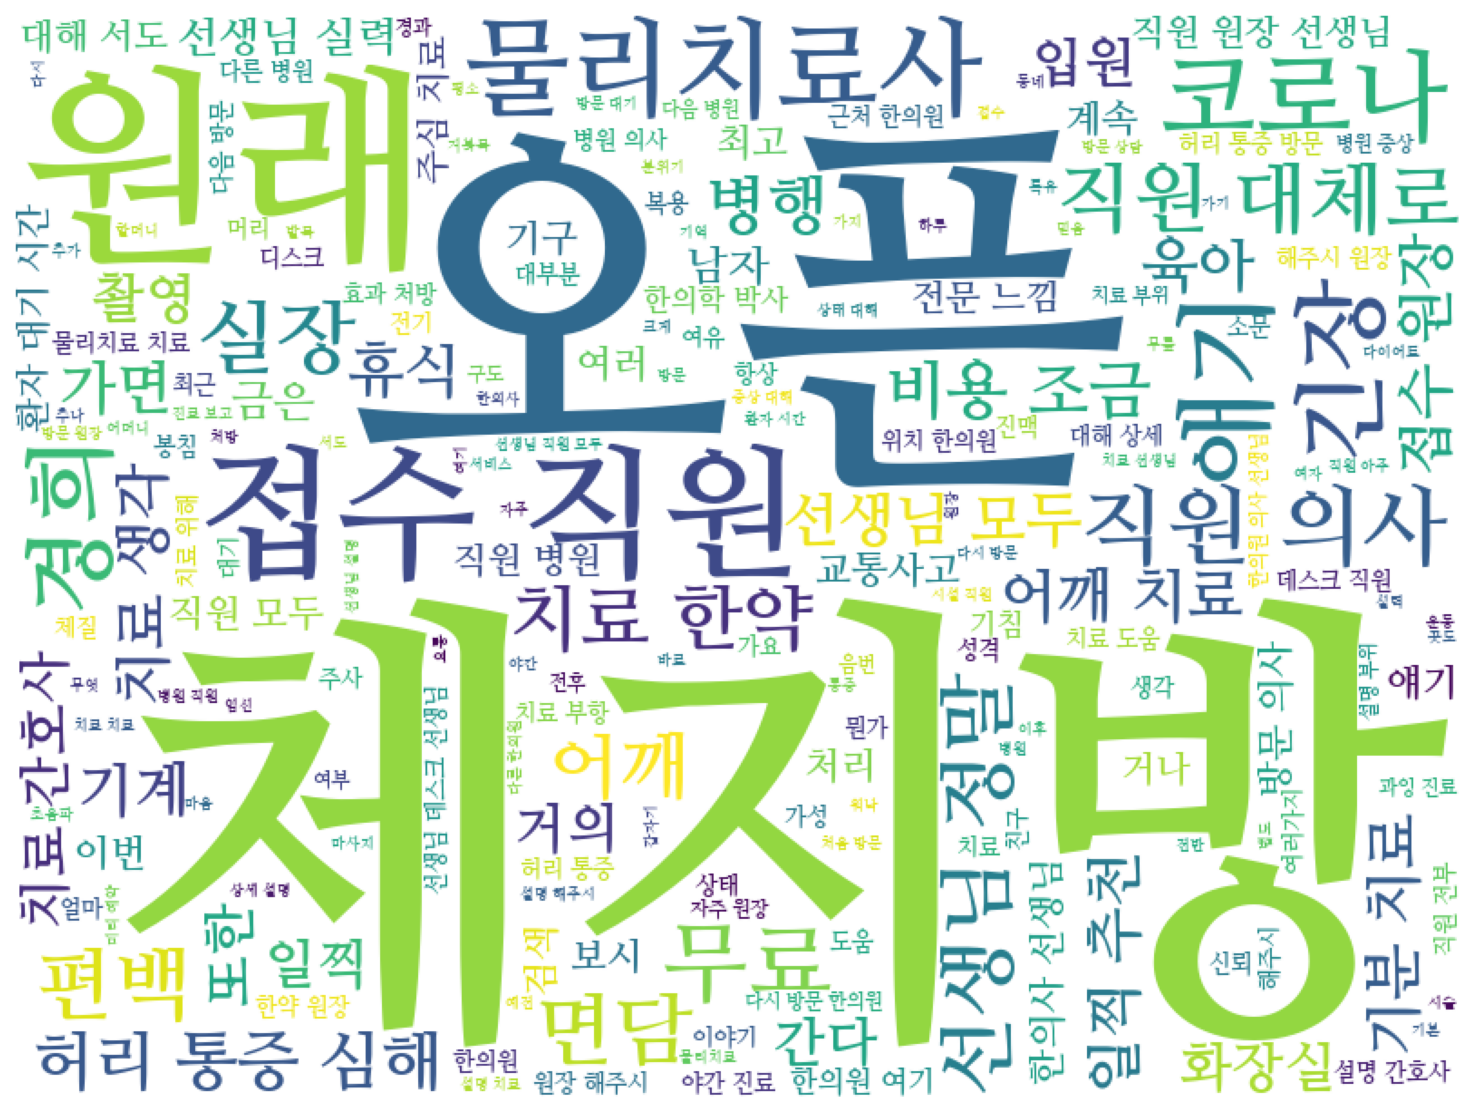

In [72]:
#불용어
from wordcloud import STOPWORDS
from wordcloud import WordCloud


mystopwords = set(STOPWORDS)
mystopwords.add('치료')
mystopwords.update(['설명의사','한의원'])


#워드클라우드. #폰트 경로설정 가장 중요


wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
                      stopwords = mystopwords,
                      background_color='white',
                      width=800,
                      height=600)

# print(dict(words_v2))

cloud = wordcloud.generate_from_frequencies(dict(words_clean))
plt.figure(figsize=(15, 10))
plt.axis('off')
plt.imshow(cloud)
plt.show()

## **NETWORK**

In [73]:
for_network.head()

,hospital,stars,reviews,adress
9,진주경희한의원,10.0,"[허리, 갑자기, 집, 곳, 직장인, 저녁, 시간, 도, 야간, 진료, 원장, 이하...",경남
10,진주경희한의원,10.0,"[난생처음, 한의원, 방문, 집, 근처, 처음, 오픈, 한의원, 병원, 부도, 간호...",경남
11,진주경희한의원,8.5,"[허리, 병원, 중, 지인, 추천, 접수, 분, 원장, 것, 것, 주시, 진료, 침...",경남
12,진주경희한의원,10.0,"[염좌, 치료, 선생님, 의사, 선생님, 증상, 대해, 설명, 때, 긴장, 편, 치...",경남
13,진주경희한의원,9.5,"[제, 지인, 추천, 병원, 제, 때, 다른, 병원, 달리, 대기, 시간, 별로, ...",경남


In [74]:
network_an = []

for i in for_network.reviews:
    if '체지방' in i:
        network_an.append(i)
    if '접수' in i :
        network_an.append(i)
    if '오픈' in i :
        network_an.append(i)
    if '물리치료사' in i:
        network_an.append(i)
    if '원래' in i:
        network_an.append(i)
    if '긴장' in i:
        network_an.append(i)
    if '애기' in i:
        network_an.append(i)
    # if '주말' in i:
    #     network_an.append(i)
    # # if '나이' in i:
    #     network_an.append(i)
 
network_an_df = pd.DataFrame({'reviews': network_an})
print(network_an_df.shape)
network_an_df.head()

(25, 1)


,reviews
0,"[난생처음, 한의원, 방문, 집, 근처, 처음, 오픈, 한의원, 병원, 부도, 간호..."
1,"[허리, 병원, 중, 지인, 추천, 접수, 분, 원장, 것, 것, 주시, 진료, 침..."
2,"[염좌, 치료, 선생님, 의사, 선생님, 증상, 대해, 설명, 때, 긴장, 편, 치..."
3,"[물리치료, 퀄리티, 말, 해도, 환자, 왜, 가면, 치료, 침, 셧, 조금, 감,..."
4,"[진료, 갈수, 곳, 치료, 복용, 약, 대해, 상세, 설명, 교통사고, 후, 치료..."


In [78]:
from apyori import apriori
result = (list(apriori(network_an_df.reviews, min_support = 0.08)))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['support'] >= 0.08)].sort_values(by='support', ascending = False)
df.head()

KeyboardInterrupt: ignored

In [ ]:
network_df = df.copy()
df_network = network_df[network_df['length']==2]
df_network.head()

In [ ]:
index= []

for num, i in enumerate (df_network['items']):
    if '체지방' in i:
        index.append(num)
    if '접수' in i:
        index.append(num)
    if '오픈' in i:
        index.append(num)
    if '물리치료사' in i:
        index.append(num)
    if '원래' in i:
        index.append(num)
    if '긴장' in i:
        index.append(num)
    if '애기' in i:
        index.append(num)
    # if '나이' in i:
    #     index.append(num)

In [ ]:
net_an = df_network.iloc[index]
net_an.head()

In [ ]:
#그래프로 표현
import networkx as nx
G = nx.Graph()
ar = (net_an['items'])
G.add_edges_from(ar)

In [ ]:
#페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 1000 * (nsize - min(nsize) / (max(nsize)-min(nsize)))

In [ ]:
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'NanumBarunGothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

In [ ]:
pos = nx.fruchterman_reingold_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'NanumBarunGothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

In [ ]:
pos = nx.spring_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'NanumBarunGothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

In [ ]:
pos = nx.random_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'NanumBarunGothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)